In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"mymoviedb.csv",lineterminator="\n")

In [3]:
print(df.shape)
df.head()

(9827, 9)


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df["Release_Date"]=pd.to_datetime(df["Release_Date"])

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


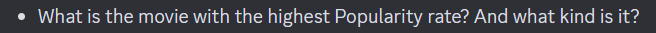

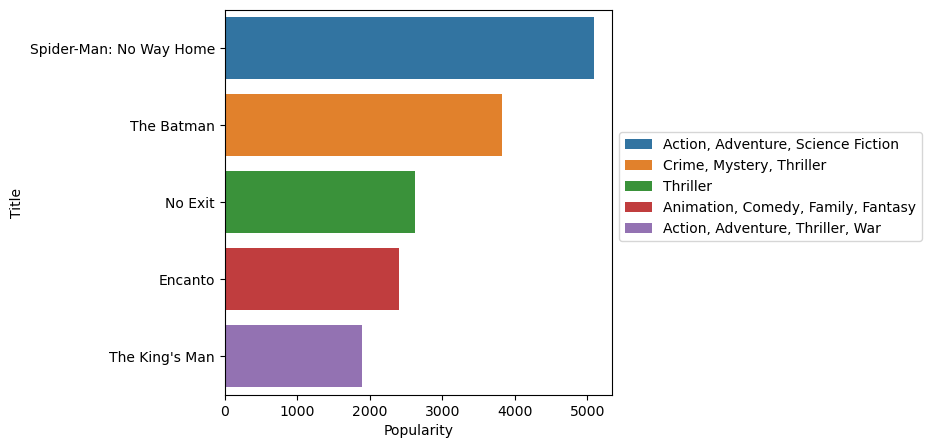

In [7]:
most_popular_movies = df[df["Popularity"].sort_values(ascending=False).index<5]
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=most_popular_movies,y="Title",x="Popularity",hue="Genre",dodge=False);
# plt.barh(y=most_popular_movies["Title"],width=most_popular_movies["Popularity"],height=0.5,hue);
plt.legend(bbox_to_anchor=(1, 0.2, 0.2, 0.5));

<h1 style="width:90%;border-radius:20px;background-color:black;color:white;padding:10px;margin-top:10px">From The Plot above we know that The most popular movie is <p style="text-align:center;color:gold;padding:3px"><span style="color:red">🕷</span>Spider-Man: No way Home</p>
and its genre is <p style="text-align:center;color:#5099ff;margin-top:-2px">Action, Adventure, Science Fiction</p></h1>

In [8]:
df["year"] = df["Release_Date"].dt.year

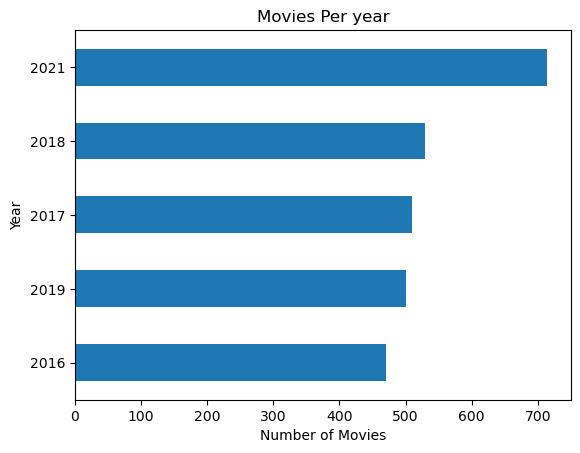

In [9]:
df["year"].value_counts().head()[::-1].plot(kind='barh')
plt.xlabel("Number of Movies")
plt.ylabel("Year")
plt.title("Movies Per year");

<h1 style="width:90%;border-radius:20px;background-color:black;color:white;padding:10px;margin-top:10px">From The Plot above we know that The year with the most number of movies is <p style="text-align:center;color:gold;padding:3px">2021⚡</p></h1>

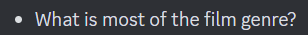

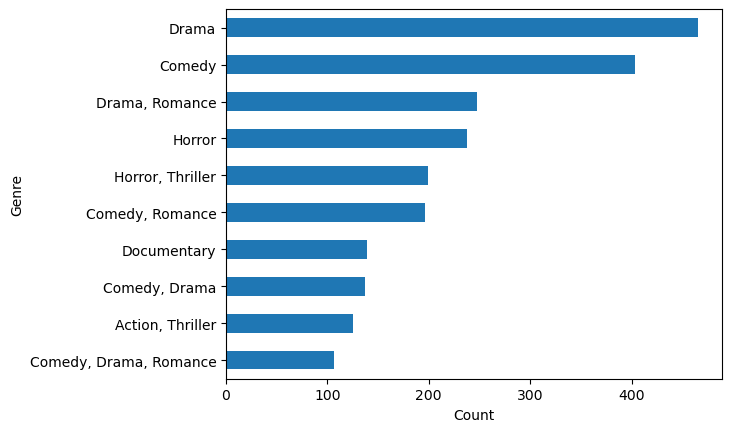

In [10]:
genre_counts_series = df["Genre"].value_counts().head(10)[::-1].plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Genre");

<h1 style="width:90%;border-radius:20px;background-color:black;color:white;padding:10px;margin-top:10px">From The Plot above we know that Most Movies Genres are <p style="text-align:center;color:#a578e9;padding:3px">Drama🎭 followed by Comedy🤡 followed by Romance🌹</p></h1>

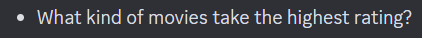

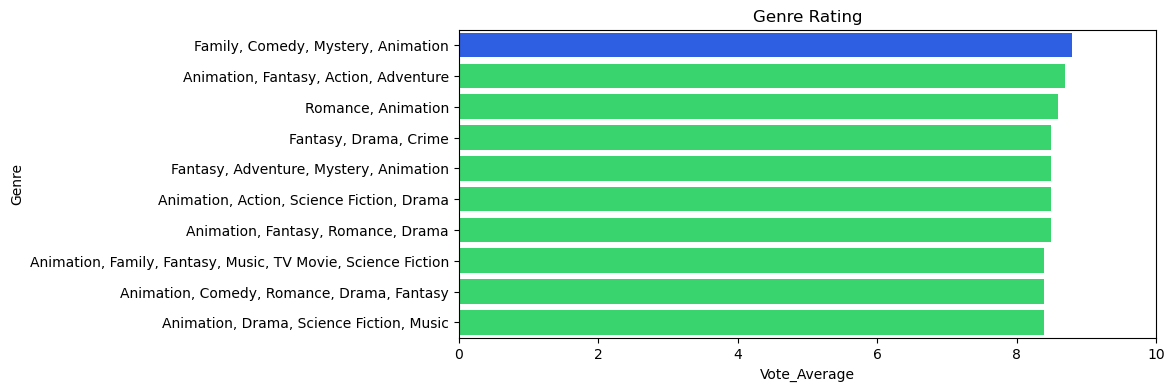

In [11]:
fig,ax = plt.subplots(figsize=(9,4))
highest_rating_genre = df.groupby("Genre")["Vote_Average"].mean().sort_values(ascending=False).head(10).to_frame().reset_index()
bar_colors = ["#20ee66" if (i<highest_rating_genre["Vote_Average"].max())else "#1050ff" for i in highest_rating_genre["Vote_Average"]]
sns.barplot(data=highest_rating_genre,x="Vote_Average",y="Genre",ax=ax,palette=bar_colors)
ax.set_xlim(0, 10);
plt.title("Genre Rating");

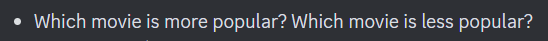

# Most Popular Movies 📈

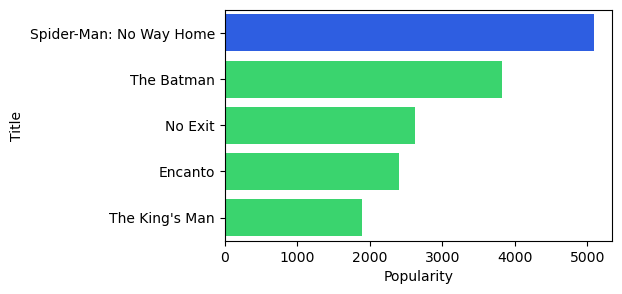

In [12]:
most_popular_movies = df[df["Popularity"].sort_values(ascending=False).index<5]
fig,ax=plt.subplots(figsize=(5,3))
bar_colors = ["#20ee66" if (i<most_popular_movies["Popularity"].max())else "#1050ff" for i in most_popular_movies["Popularity"]]
sns.barplot(data=most_popular_movies,y="Title",x="Popularity",ax=ax,dodge=True,color="#20ee66",palette=bar_colors);
# plt.barh(y=most_popular_movies["Title"],width=most_popular_movies["Popularity"],height=0.5,hue);

# Least Popular Movies 📉

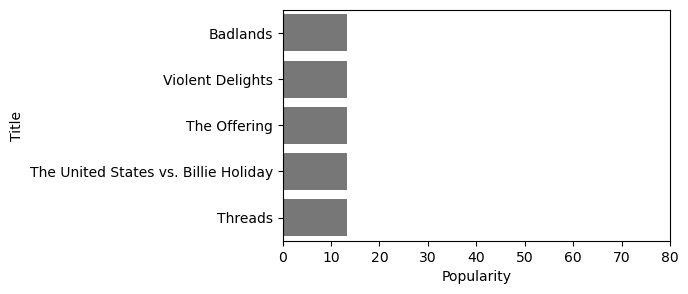

In [13]:
least_popular_movies = df[df["Popularity"].sort_values(ascending=True).index<5]
fig,ax=plt.subplots(figsize=(5,3))
sns.barplot(data=least_popular_movies,y="Title",x="Popularity",dodge=True,color="#777",ax=ax)
ax.set_xlim(0, 80); 
# plt.barh(y=most_popular_movies["Title"],width=most_popular_movies["Popularity"],height=0.5,hue);